![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [153]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg

In [154]:
# Load dataframes
men = pd.read_csv("men_results.csv", parse_dates=["date"])
women = pd.read_csv("women_results.csv", parse_dates=["date"])

In [155]:
# Preview men dataframe
men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [156]:
# Preview men dataframe
women.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [157]:
# Check both dataframe info
men.info()
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  44353 non-null  int64         
 1   date        44353 non-null  datetime64[ns]
 2   home_team   44353 non-null  object        
 3   away_team   44353 non-null  object        
 4   home_score  44353 non-null  int64         
 5   away_score  44353 non-null  int64         
 6   tournament  44353 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  4884 non-null   int64         
 1   date        4884 non-null   datetime64[ns]
 2   home_team   4884 non-null   object        
 3   away_team   4884 non-null   object      

In [158]:
# Subset both dataframes to only include official FIFA World Cup matches that took place after 2002-01-01
men.query('tournament == "FIFA World Cup" and date > "2002-01-01"', inplace=True)
women.query('tournament == "FIFA World Cup" and date > "2002-01-01"', inplace=True)

In [159]:
# Check both dataframe info
men.info()
women.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 25164 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  384 non-null    int64         
 1   date        384 non-null    datetime64[ns]
 2   home_team   384 non-null    object        
 3   away_team   384 non-null    object        
 4   home_score  384 non-null    int64         
 5   away_score  384 non-null    int64         
 6   tournament  384 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 24.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1600 to 4469
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  200 non-null    int64         
 1   date        200 non-null    datetime64[ns]
 2   home_team   200 non-null    object        
 3   away_team   200 non-null    object 

In [160]:
# Add a total_goals column in each dataframe
men['total_goals'] = men['home_score'] + men['away_score']
women['total_goals'] = women['home_score'] + women['away_score']

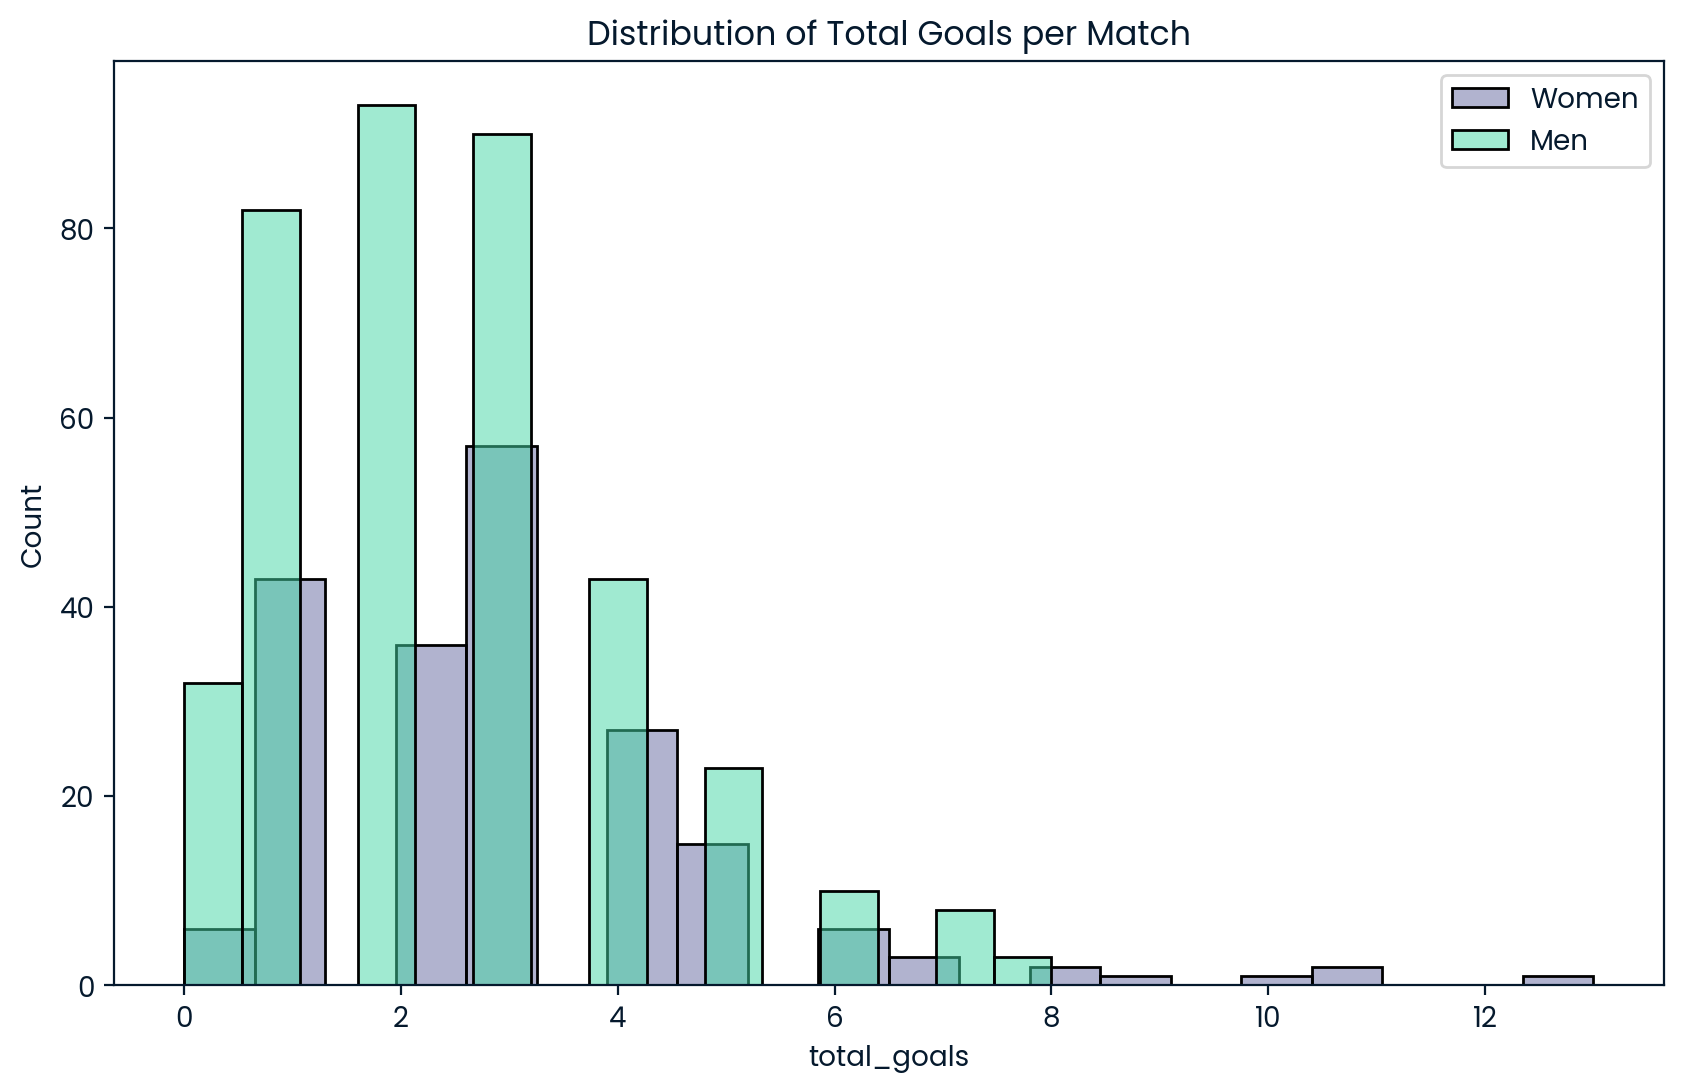

In [161]:
# Plot an histgram to see if the data is normally distributed
plt.figure(figsize=(10, 6))
sns.histplot(data=women, x='total_goals', label='Women', alpha=0.5)
sns.histplot(data=men, x='total_goals', label='Men', alpha=0.5)
plt.title('Distribution of Total Goals per Match')
plt.legend()
plt.show()

In [162]:
# As the data is not normally distributed, perform a two-sided Wilcoxon-Mann-Whitney test
wmw_test = pg.mwu(women['total_goals'], men['total_goals'], alternative='greater')
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451


In [163]:
# Extract p-value from wmw_test
p_val = wmw_test['p-val'].iloc[0]

# Define significance level
alpha = 0.10

# Determine the result
result = "reject" if p_val < alpha else "fail to reject"

# Store results in a dictionary
result_dict = {"p_val": p_val, "result": result}

print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}


[MIT License](https://github.com/vzamboulingame/data-portfolio/blob/main/LICENSE)

Copyright © Vinodh Zamboulingame